# Contagem de pixels para medida de área de corpos de prova

A área de silhueta de um corpo de prova de pouca espessura, pode ser uma medida análoga à área de superfície, por isso, este Notebook visa determinar a área de sihlueta de diferentes corpos de prova e fazer uma analise temporal da evolução destas áreas, a partir do tratamento de imagens destes corpos.

O tratamento de imagem consiste em usar um filtro binário com limite determinado pelo algorítmo de Otsu e em seguida separar a maior borda (por área) dos elementos da imagem resultante, usando a função `findCountous()` da biblioteca de visão computacional, OpenCV.

A partir da borda do elemento, é possível saber a área em pixels e, usando um objeto de referência, de área conhecida, determinar a área do corpo de prova.

## Demonstração do método de contagem
Primeiramente, importamos as bibliotecas necessárias.

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

A seguinte imagem será usada para demonstração:

In [28]:
ex = 'amostras-mes5/S3.jpg'

Importa a imagem em escala de cinza e binzariza ela usando o algoritmo de Otsu, para separar entre valores de luminosidade abaixo e acima de um limite conviniente determinado pelo algortimo.

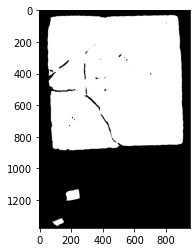

In [29]:
imgarr = cv2.imread(ex, cv2.IMREAD_GRAYSCALE)

_, binarie = cv2.threshold(src=imgarr, thresh=0, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(binarie, 'gray')
plt.show()

Remoçao apenas da borda da amostra.

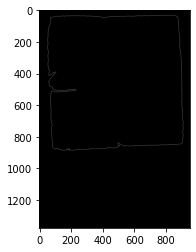

In [30]:
contours, _, = cv2.findContours(image=binarie, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
cnt = max(contours, key=cv2.contourArea)
# encontra a borda de maior área usando a função `cv2.contourArea()`

contour_img = np.zeros_like(imgarr)  # nova imagem (matriz) vazia do tamnho da original
cv2.drawContours(image=contour_img, contours=[cnt], contourIdx=-1, color=255, thickness=1)

plt.imshow(contour_img, 'gray')
plt.show()

Para calcular a área dentro da borda, basta usar a função previamente utilizada, `cv2.contourArea()`.

In [31]:
cv2.contourArea(cnt)

682793.5

Podemos encapsular este processo numa função que retorna o número de pixels:

In [32]:
def contar(path: str) -> int:
    imgarr = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    _, binarie = cv2.threshold(src=imgarr, thresh=0, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    contours, _, = cv2.findContours(image=binarie, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key=cv2.contourArea)
    # encontra a borda de maior área usando a função `cv2.contourArea()`
    return cv2.contourArea(cnt)

## Aplicação do método de contagem às imagens
Primeiro iremos criar um dicionário com a chave sendo o caminho do arquivo das imagens e o valor o número de pixels.

In [33]:
from itertools import product

In [34]:
arq = 'amostras-mes{}/{}.jpg'
bases = [
        # '{}',
        'AL{}',
        'AS{}',
        'M{}',
        'S{}',
        'REF{}'
        ]

In [35]:
n_meses = 5
results = {arq.format(mes, base.format(n)): 0 for mes, base, n in product(range(1, n_meses+1), bases, range(1, 3+1))}
# cria um dicionário cujas chaves são preenchidas para cada mes num intervalo de 1 a n_meses, para todas
# as bases de nome listadas anteriormente, para todos os valores de 1 a 3 (S1, S2, S3)

Resultado:

In [36]:
results

{'amostras-mes1/AL1.jpg': 0,
 'amostras-mes1/AL2.jpg': 0,
 'amostras-mes1/AL3.jpg': 0,
 'amostras-mes1/AS1.jpg': 0,
 'amostras-mes1/AS2.jpg': 0,
 'amostras-mes1/AS3.jpg': 0,
 'amostras-mes1/M1.jpg': 0,
 'amostras-mes1/M2.jpg': 0,
 'amostras-mes1/M3.jpg': 0,
 'amostras-mes1/S1.jpg': 0,
 'amostras-mes1/S2.jpg': 0,
 'amostras-mes1/S3.jpg': 0,
 'amostras-mes1/REF1.jpg': 0,
 'amostras-mes1/REF2.jpg': 0,
 'amostras-mes1/REF3.jpg': 0,
 'amostras-mes2/AL1.jpg': 0,
 'amostras-mes2/AL2.jpg': 0,
 'amostras-mes2/AL3.jpg': 0,
 'amostras-mes2/AS1.jpg': 0,
 'amostras-mes2/AS2.jpg': 0,
 'amostras-mes2/AS3.jpg': 0,
 'amostras-mes2/M1.jpg': 0,
 'amostras-mes2/M2.jpg': 0,
 'amostras-mes2/M3.jpg': 0,
 'amostras-mes2/S1.jpg': 0,
 'amostras-mes2/S2.jpg': 0,
 'amostras-mes2/S3.jpg': 0,
 'amostras-mes2/REF1.jpg': 0,
 'amostras-mes2/REF2.jpg': 0,
 'amostras-mes2/REF3.jpg': 0,
 'amostras-mes3/AL1.jpg': 0,
 'amostras-mes3/AL2.jpg': 0,
 'amostras-mes3/AL3.jpg': 0,
 'amostras-mes3/AS1.jpg': 0,
 'amostras-mes3/AS2.

Precisa-se remover da lista algumas imagens que foram perdidas:

In [37]:
def remover(base: str, mes: int):
    for n in range(1, 3+1):
        results.pop(arq.format(mes, base.format(n)))

In [38]:
# remover(bases[3], 1)
# remover(bases[0], 2)

Agora basta aplicar a função `contar()` para todos os objetos do dicionário e depois converter os valores para áreas com base nas referências.

In [39]:
for key in results:
    results[key] = contar(key)

[ WARN:0@174.501] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('amostras-mes1/REF1.jpg'): can't open/read file: check file path/integrity


ValueError: max() arg is an empty sequence

## Tratando os dados
Resta comparar os corpos de prova com os objetos de referência de cada mês, para determinar as respectivas áreas. Depois calcular os desvios padrão, plotar os gráficos e calcular os coeficientes de correlação.

Para começar, vamoos fazer uma lista de dicionários, onde cada dicionário corresponde aos meses, cada chave dos dicionários ao nome dos arquivos e cada valor, a área em $cm^2$.

In [ ]:
refs_area = [
    {
    bases[0].format(1): 2.6 * 2.6,
    bases[0].format(2): 2.6 * 2.595,
    bases[0].format(3): 2.6 * 2.6
    },

    {
    bases[-1].format(1): 3 ** 2,  # REF1
    bases[-1].format(2): 3 ** 2,  # '' 2
    bases[-1].format(3): 3 ** 2   # etc
    },

    {
    bases[-1].format(1): 3 ** 2,
    bases[-1].format(2): 3 ** 2,
    bases[-1].format(3): 3 ** 2
    },

    {
    bases[-1].format(1): 3 ** 2,
    bases[-1].format(2): 3 ** 2,
    bases[-1].format(3): 3 ** 2
    },

    {
    bases[-1].format(1): 3 ** 2,
    bases[-1].format(2): 3 ** 2,
    bases[-1].format(3): 3 ** 2
    },
]

Para usar as referências de um mês como medida de área, basta caluclar a área por píxel $A_p$ de cada foto, fazendo $A_p=\frac{Area}{\#Pixels}$

In [ ]:
def ap_mes(n: int):
    mes = refs_area[n-1]
    aps = [mes[k] / results[arq.format(n, k)] for k in mes]
    
    return np.mean(aps), np.std(aps)

Sabendo $A_p$, basta multiplicar-lo pelos valores em `results` para determinar as respectivas áreas em $cm^2$.

In [ ]:
areas = []
for k in results:
    m = int(k.split('/')[0][-1])  # descobre o número do mês
    areas.append(results[k] * ap_mes(m)[0])

IndexError: list index out of range

Visualização dos valores das áreas no eixo y:

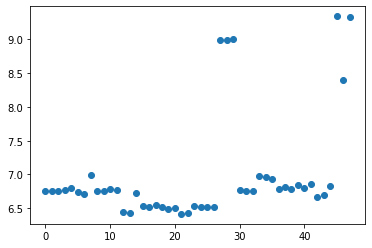

In [ ]:
plt.scatter(np.arange(len(areas)), areas)